<a href="https://colab.research.google.com/github/LordFagner/projetoAlura2/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = '/content/arquivos/TelecomX_Data_com_0_e_1.csv'
df = pd.read_csv(url)



FileNotFoundError: [Errno 2] No such file or directory: '/content/arquivos/TelecomX_Data_com_0_e_1.csv'

#🔧 Transformação

In [ ]:
total_clientes = df['customerid'].count()

pessoas_que_ficaram = df.query('churn == 0')
pessoas_que_sairam = df.query('churn == 1')

total_que_permanesceram = pessoas_que_ficaram['churn'].count()
total_que_sairam = pessoas_que_sairam['churn'].count()

percentual_que_sairam = (total_que_sairam / total_clientes) * 100
percentual_que_ficaram = (total_que_permanesceram / total_clientes) * 100

homens_que_sairam = pessoas_que_sairam.query('gender == 2')
mulheres_que_sairam = pessoas_que_sairam.query('gender == 1')

homens_que_sairam_percentual = (homens_que_sairam['customerid'].count() / total_que_sairam) * 100
mulheres_que_sairam_percentual = (mulheres_que_sairam['customerid'].count() / total_que_sairam) * 100

mais_de_65 = df.query('seniorcitizen == 1')
mais_de_65_sairam = mais_de_65.query('churn == 1')

mais_de_65_ficaram_percentual = (mais_de_65.query('churn == 0')['customerid'].count() / mais_de_65['customerid'].count()) * 100
mais_de_65_percentual_sairam = (mais_de_65_sairam['customerid'].count() / mais_de_65['customerid'].count()) * 100

mais_de_65_homens_sairam = mais_de_65_sairam.query('gender == 2')
mais_de_65_mulheres_sairam = mais_de_65_sairam.query('gender == 1 ')


com_parceiro = df.query('partner == 1')

com_parceiro_homens_sairam = com_parceiro.query('gender == 2 and churn == 1')
com_parceiro_mulheres_sairam = com_parceiro.query('gender == 1 and churn == 1')
com_parceiro_sairam = com_parceiro.query('churn == 1')['customerid'].count()
com_parceiro_sairam_percentual = (com_parceiro.query('churn == 1')['customerid'].count() / com_parceiro['customerid'].count()) * 100
com_parceiros_ficaram_percentual = (com_parceiro.query('churn == 0')['customerid'].count() / com_parceiro['customerid'].count()) * 100

percentual_conjuge_homem = (com_parceiro_homens_sairam['customerid'].count() / com_parceiro_sairam) * 100
percentual_conjuge_mulher = (com_parceiro_mulheres_sairam['customerid'].count() / com_parceiro_sairam) * 100

com_dependentes = df.query('dependents == 1')

com_dependentes_homens_sairam = com_dependentes.query('gender == 2 and churn == 1')
com_dependentes_mulheres_sairam = com_dependentes.query('gender == 1 and churn == 1')

com_dependentes_total = com_dependentes['customerid'].count()
com_dependentes_sairam_perecentual = com_dependentes.query('churn == 1')['customerid'].count() / com_dependentes_total * 100
com_dependentes_ficaram_percentual = (com_dependentes.query('churn == 0')['customerid'].count() / com_dependentes_total) * 100


internet_e_telefone = pessoas_que_sairam.query('internetservice != 0 and phoneservice == 1')

so_telefone = pessoas_que_sairam.query('phoneservice == 1 and internetservice == 0')

so_internet = pessoas_que_sairam.query('internetservice != 0 and phoneservice == 0')

churns_que_usam_DSL = pessoas_que_sairam.query('internetservice == 1')
churns_que_usam_fibra = pessoas_que_sairam.query('internetservice == 2')

servicos = [
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
]

total_internet_telefone = internet_e_telefone['customerid'].count()

servicos_porcentagens = {
    serv: (internet_e_telefone.query(f'{serv} == 1')['customerid'].count() / total_internet_telefone) * 100
    for serv in servicos
}

# corrigindo as variáveis com nomes errados
contratos_sairam = pessoas_que_sairam['contract'].value_counts().sort_index()
contratos_ficaram = pessoas_que_ficaram['contract'].value_counts().sort_index()

metodos_pagamentos_ficaram = pessoas_que_ficaram['paymentmethod'].value_counts().sort_index()
metodos_pagamentos_sairam = pessoas_que_sairam['paymentmethod'].value_counts().sort_index()







#bom infelizemente eu fiz a maioria no meu git hub , mais deixarei esse anexado ao git, pra vcs teremem uma noção do que foi feito
# mais basicamente usamos muito da estrutura unique , para extrair os valores é troca-los para numericos para fins de velocidade e manopulação numerica
#muito se baseou no seguinte exemplo  valores_para_elemento = {val : ind , for val,ind in enumerate(df['coluna'].dropna().unique().str.lower())} é após isso
# o uso da função map para uma unica coluna , é applymap para os demais , estará constando nos comitts do github




#📊 Carga e análise

#📄Relatorio Final

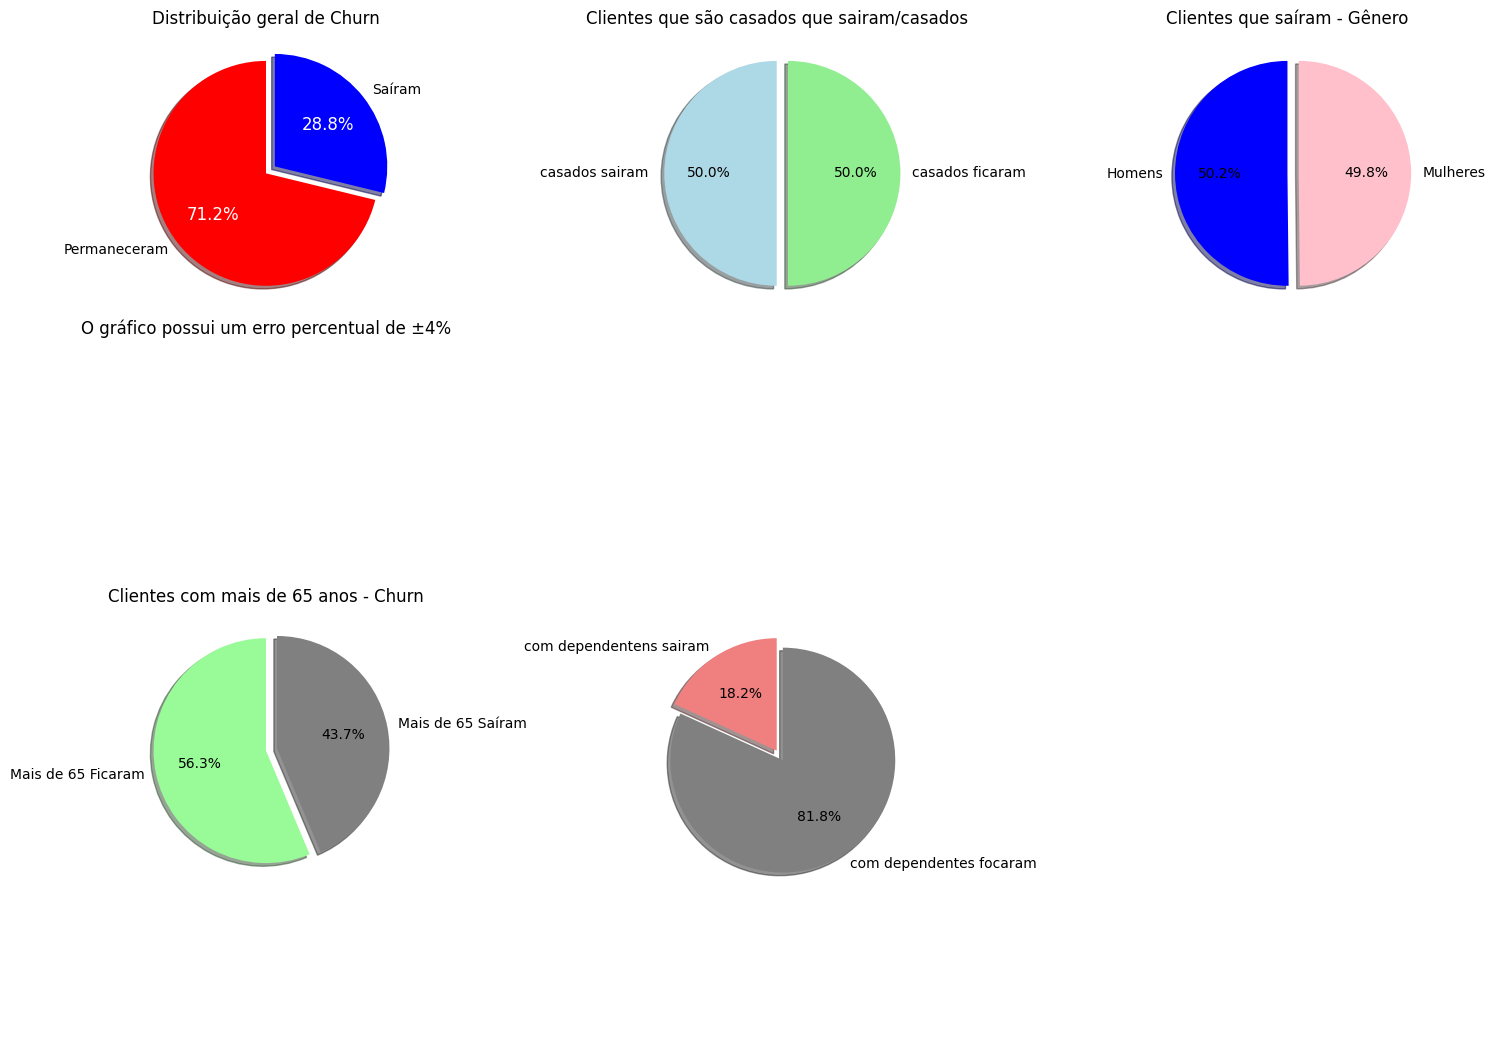

TypeError: can only concatenate str (not "int") to str

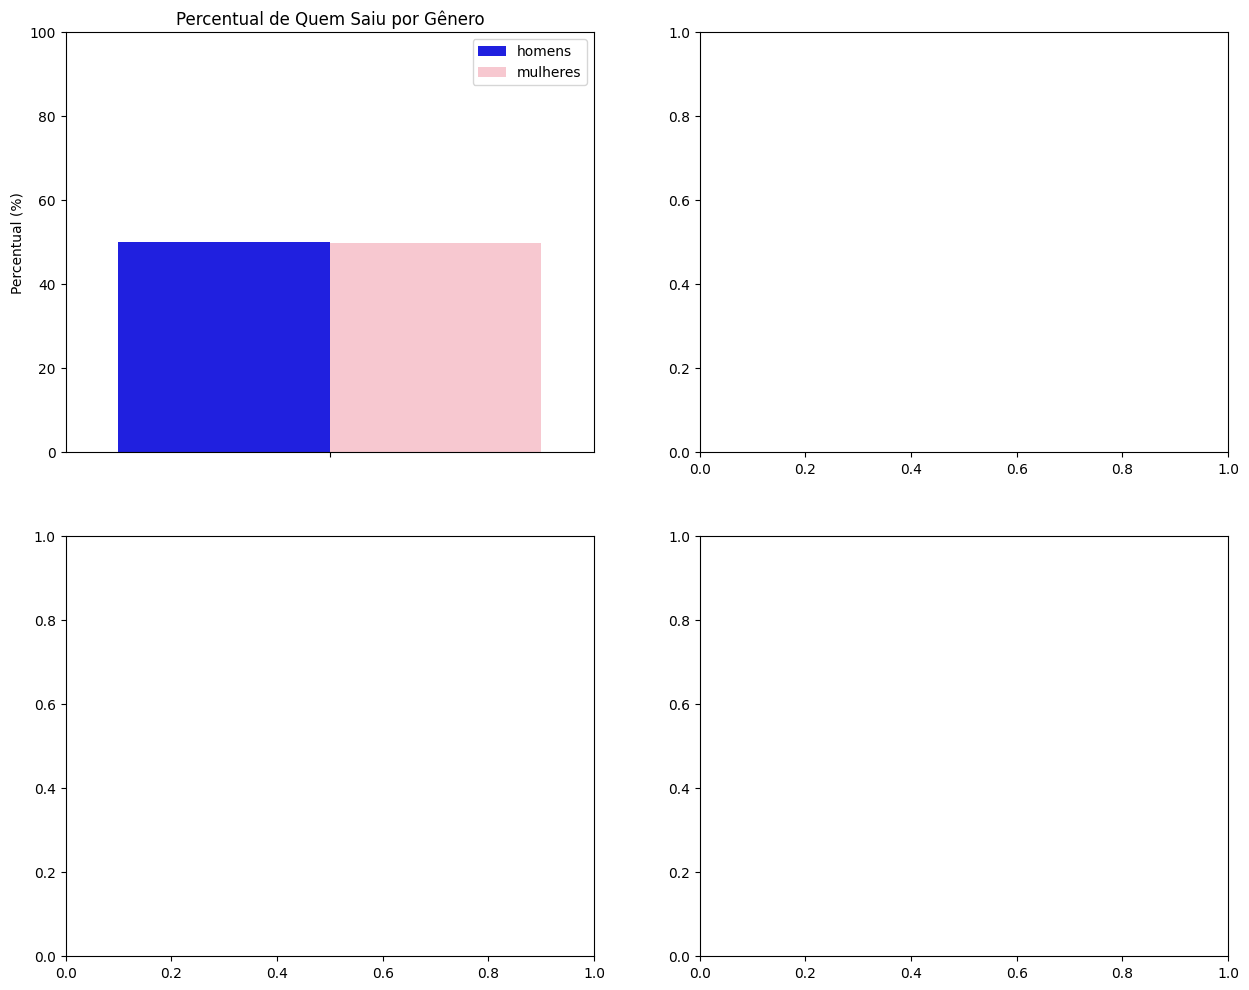

In [18]:
import matplotlib.pyplot as plt

fig, sairam_ficaram = plt.subplots(2, 3, figsize=(15, 12))

# ---------------------------
# Gráfico 1 - Churn geral
wd, tx, at = sairam_ficaram[0, 0].pie(
    [total_que_permanesceram, total_que_sairam],
    labels=['Permaneceram', 'Saíram'],
    colors=['red', 'blue'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)

for text in at:
    text.set_color('white')
    text.set_fontsize(12)

# Adicionando texto no gráfico
sairam_ficaram[0, 0].text(
    0, -1.3,
    'O gráfico possui um erro percentual de ±4%',
    fontsize=12, ha='center', va='top', color='black'
)
sairam_ficaram[0, 0].set_title('Distribuição geral de Churn')

# ---------------------------
# Gráfico 2 -
sairam_ficaram[0, 1].pie(
    [com_parceiro_sairam_percentual, com_parceiro_sairam_percentual],
    labels=['casados sairam ', 'casados ficaram '],
    colors = ['lightblue', 'lightgreen'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[0, 1].set_title('Clientes que são casados que sairam/casados')

# ---------------------------
# Gráfico 3 - Gênero dos que saíram
sairam_ficaram[0, 2].pie(
    [homens_que_sairam_percentual, mulheres_que_sairam_percentual],
    labels=['Homens', 'Mulheres'],
    colors=['blue', 'pink'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[0, 2].set_title('Clientes que saíram - Gênero')

# ---------------------------
# Gráfico 4 - Mais de 65 anos: Ficaram vs Saíram
sairam_ficaram[1, 0].pie(
    [mais_de_65_ficaram_percentual, mais_de_65_percentual_sairam],
    labels=['Mais de 65 Ficaram', 'Mais de 65 Saíram'],
    colors=['palegreen', 'gray'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[1, 0].set_title('Clientes com mais de 65 anos - Churn')

# ---------------------------
# Espaço vazio nos gráficos [1,1] e [1,2] (se quiser pode usar ou deixar em branco)
sairam_ficaram[1, 1].pie(
    [com_dependentes_sairam_perecentual, com_dependentes_ficaram_percentual],
    labels=['com dependentens sairam', 'com dependentes ficaram'],
    colors=['lightcoral', 'gray'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[1, 2].axis('off')
for ax in sairam_ficaram.flat:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.5)





plt.tight_layout()
plt.show()




fig2,ax = plt.subplots(2,2,figsize=(15, 12))

sns.barplot(hue=['homens','mulheres'] , y=[homens_que_sairam_percentual, mulheres_que_sairam_percentual], palette=['blue', 'pink'], ax=ax[0,0])

ax[0, 0].set_title('Percentual de Quem Saiu por Gênero')
ax[0, 0].set_ylabel('Percentual (%)')
ax[0, 0].set_ylim(0, 100)
valores = [homens_que_sairam, mulheres_que_sairam]
for index, value in enumerate(valores):
    ax[0, 0].text(
        index,                          # Posição x (posição da barra)
        value + 2,                      # Posição y (um pouco acima da barra)
        f'{value:.1f}%',                # Texto com 1 casa decimal
        ha='center', fontsize=11, color='black'
    )
ax[0, 1].set_visible(False)  # Desativa se quiser
ax[1, 0].set_visible(False)  # Desativa se quiser
ax[1, 1].set_visible(False)